In [78]:
from cartoframes.auth import set_default_credentials, Credentials
set_default_credentials('vshelar-vistar', 'e77fbbbc114706f991e21a2c689aba4a80b5307f')
from cartoframes import to_carto
from cartoframes import read_carto

import seaborn as sns
sns.set()

In [79]:
plt.rcParams['figure.figsize']=(12,8)

In [49]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nyc_zips = gp.read_file("./ZIP_CODE_040114/ZIP_CODE_040114.shp")

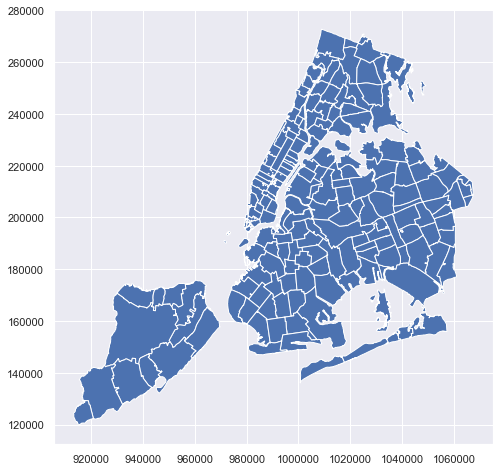

In [80]:
nyc_zips.plot()

In [8]:
nyc_covid = pd.read_csv("./coronavirus-data-master/tests-by-zcta.csv")

In [10]:
nyc_covid.shape

(178, 4)

In [11]:
nyc_covid.dropna().shape

(177, 4)

In [12]:
nyc_covid.dropna(inplace=True)

In [14]:
nyc_covid.dtypes

MODZCTA              float64
Positive               int64
Total                  int64
zcta_cum.perc_pos    float64
dtype: object

In [15]:
nyc_zips.shape

(263, 13)

In [16]:
nyc_zips.dtypes

ZIPCODE         object
BLDGZIP         object
PO_NAME         object
POPULATION     float64
AREA           float64
STATE           object
COUNTY          object
ST_FIPS         object
CTY_FIPS        object
URL             object
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
dtype: object

In [17]:
nyc_zips.head(2)

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.252 188138.380, 1038141.936 ...  
1  POLYGON ((1001613.713 186926.440, 1002314.243 ...

In [30]:
nyc_zips.ZIPCODE = nyc_zips.ZIPCODE.astype('float')
nyc_covid.MODZCTA = nyc_covid.MODZCTA.astype('float')

In [32]:
nyc_zips_covid = pd.merge(nyc_zips, nyc_covid, left_on='ZIPCODE', right_on='MODZCTA', how='left')

In [33]:
nyc_zips_covid.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'MODZCTA', 'Positive', 'Total', 'zcta_cum.perc_pos'],
      dtype='object')

In [34]:
nyc_zips_covid = nyc_zips_covid[['ZIPCODE', 'PO_NAME', 'POPULATION', 'AREA',
       'COUNTY', 'geometry', 'Positive', 'Total', 'zcta_cum.perc_pos']].copy()

In [38]:
nyc_zips_covid.crs

{'init': 'epsg:2263'}

In [39]:
nyc_zips_covid = nyc_zips_covid.to_crs("EPSG:4326")

In [40]:
# {'init': 'epsg:4326'}

In [58]:
nyc_zips_covid['per_postive'] = 100*nyc_zips_covid.Positive/nyc_zips_covid.POPULATION

In [42]:
to_carto(nyc_zips_covid, 'vs_covid_nyc_zips', if_exists='replace')

Success! Data uploaded to table "vs_covid_nyc_zips" correctly


In [46]:
nyc_zips_covid.to_file("covid_zips.geojson", driver='GeoJSON')

In [69]:
nyc_zips_covid_all = nyc_zips_covid.copy()
nyc_zips_covid = nyc_zips_covid[~(nyc_zips_covid.AREA == nyc_zips_covid.AREA.max())].copy()

In [86]:
def scatter_plot(df, x, y):
    plt.scatter(df[x], df[y])
    plt.title(x + " vs " + y, size=20)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

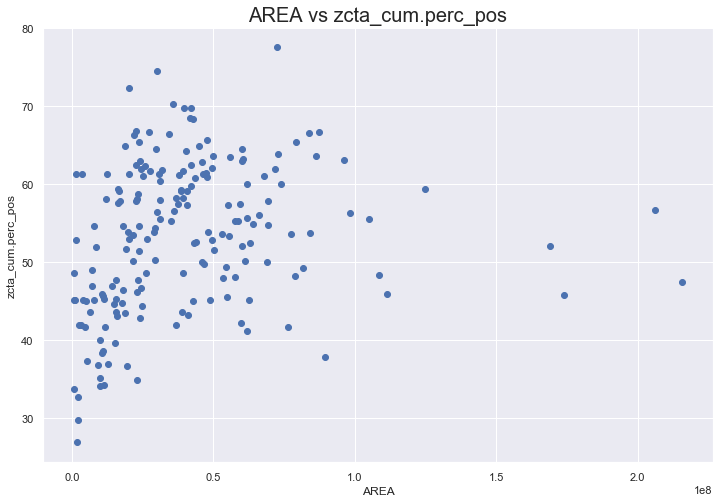

In [87]:
scatter_plot(nyc_zips_covid, 'AREA', 'zcta_cum.perc_pos')
# plt.scatter(nyc_zips_covid.AREA, nyc_zips_covid['zcta_cum.perc_pos'])

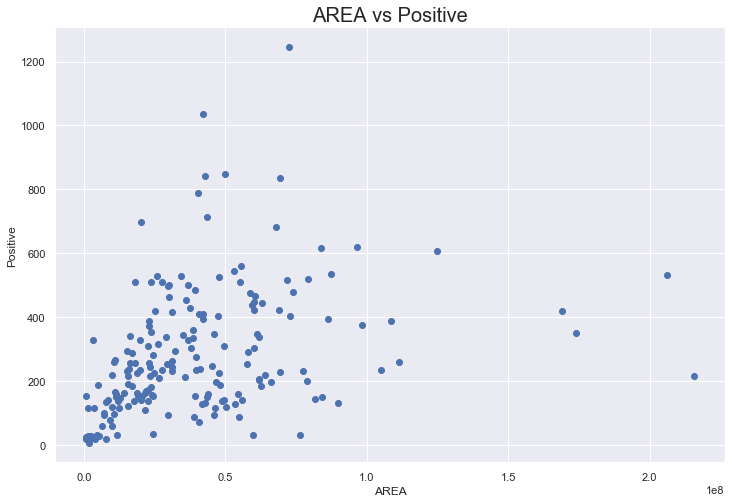

In [88]:
scatter_plot(nyc_zips_covid, 'AREA', 'Positive')
# plt.scatter(nyc_zips_covid.AREA, nyc_zips_covid['Positive'])

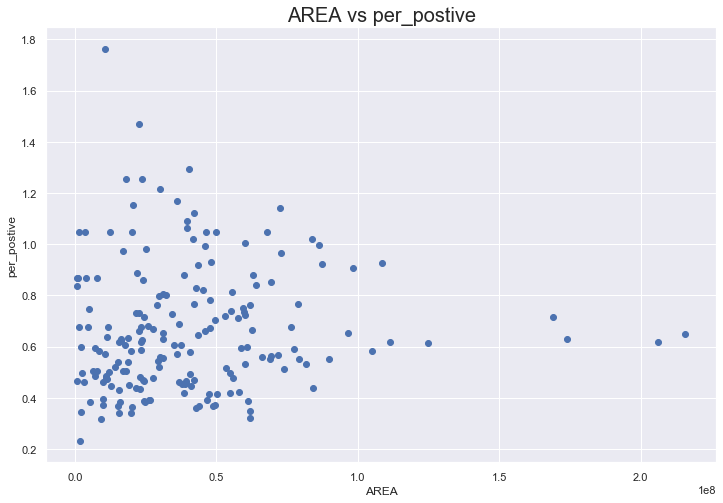

In [89]:
scatter_plot(nyc_zips_covid, 'AREA', 'per_postive')
# plt.scatter(nyc_zips_covid.AREA, nyc_zips_covid['per_postive'])

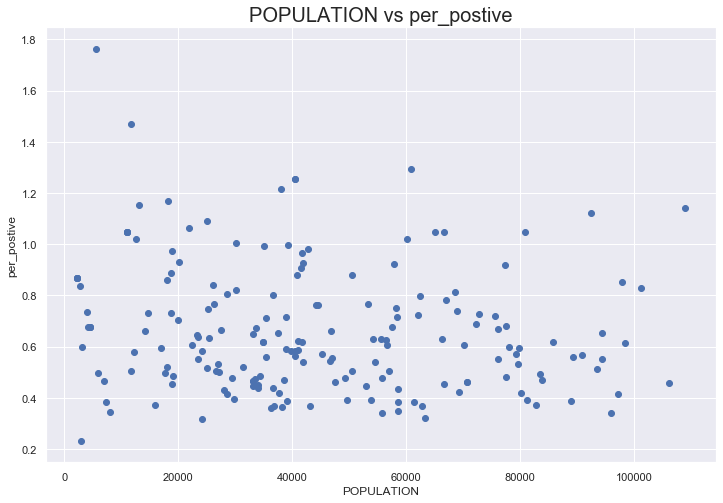

In [90]:
scatter_plot(nyc_zips_covid, 'POPULATION', 'per_postive')
# plt.scatter(nyc_zips_covid.POPULATION, nyc_zips_covid['per_postive'])

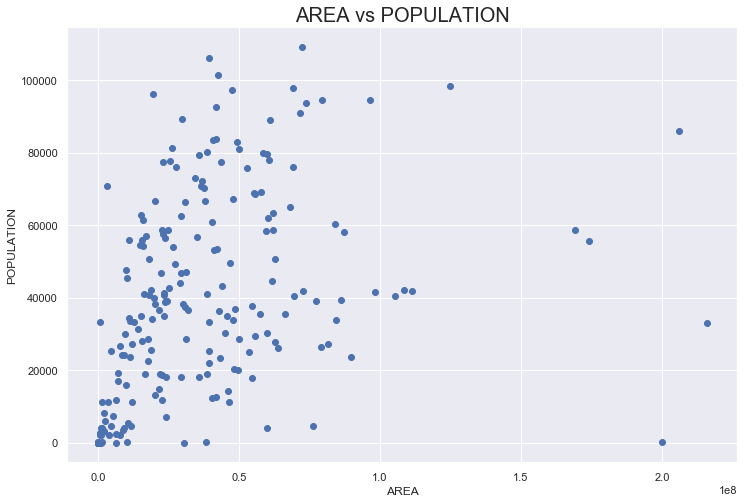

In [91]:
scatter_plot(nyc_zips_covid, 'AREA', 'POPULATION')
# plt.scatter(nyc_zips_covid.AREA, nyc_zips_covid['POPULATION'])

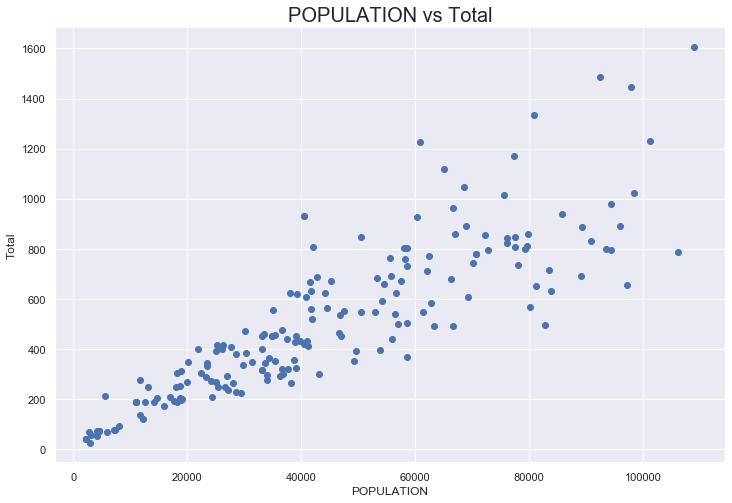

In [100]:
scatter_plot(nyc_zips_covid, 'POPULATION', 'Total')

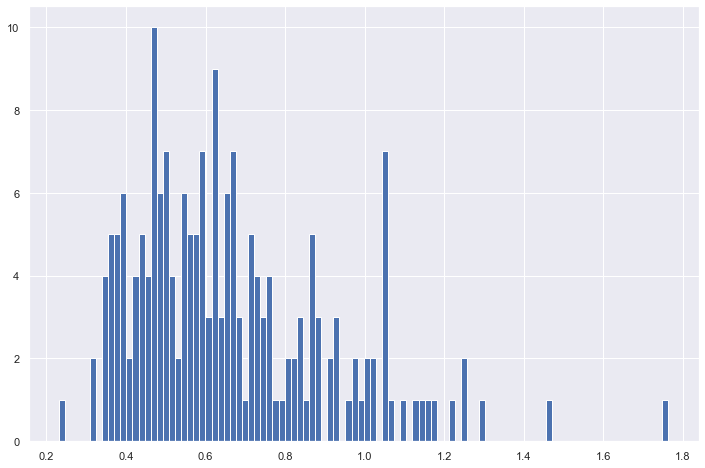

In [97]:
nyc_zips_covid['per_postive'].hist(bins=100)
# nyc_zips_covid['Positive'].hist(alpha=0.5)

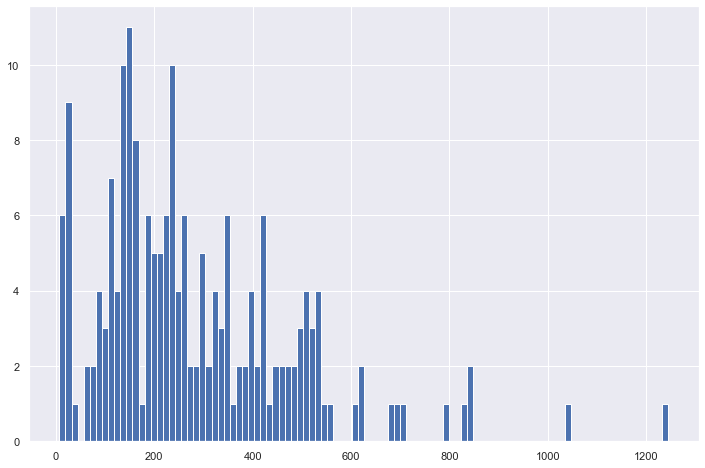

In [98]:
nyc_zips_covid['Positive'].hist(bins=100)

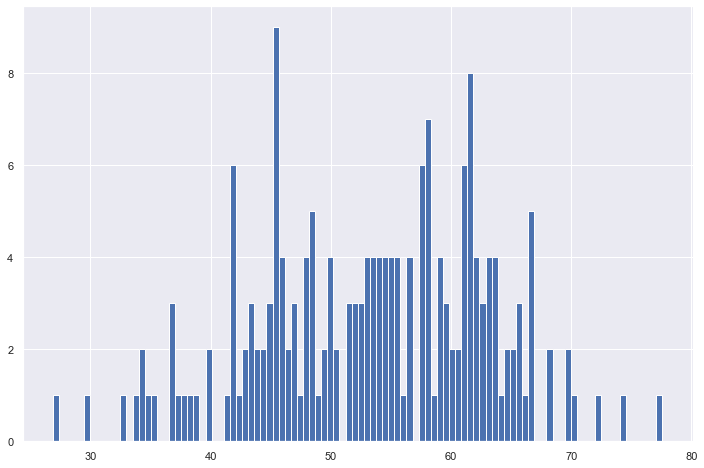

In [99]:
nyc_zips_covid['zcta_cum.perc_pos'].hist(bins=100)